In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')
data.head

<bound method NDFrame.head of             Date     Open     High      Low    Close    Volume
0     2016-01-04  1099.59  1110.75  1093.85  1109.64  66545000
1     2016-01-05  1117.47  1130.57  1112.75  1125.85  41227200
2     2016-01-06  1116.63  1138.68  1116.10  1133.04  42316800
3     2016-01-07  1122.00  1149.76  1117.56  1143.37  64899600
4     2016-01-08  1145.64  1149.96  1120.93  1122.88  52138900
...          ...      ...      ...      ...      ...       ...
1650  2022-07-25  2412.25  2429.44  2387.41  2402.95  29106300
1651  2022-07-26  2289.29  2307.08  2255.66  2280.27  48503400
1652  2022-07-27  2309.14  2404.25  2296.82  2395.54  43790900
1653  2022-07-28  2385.58  2443.26  2377.34  2434.89  25807000
1654  2022-07-29  2410.86  2479.24  2406.35  2474.93  32907600

[1655 rows x 6 columns]>

In [3]:
training_set = data.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1655, 1)

In [5]:
X_train = []
y_train = []
for i in range(60, 1655):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
50/50 [==============================] - 11s 74ms/step - loss: 0.0284
Epoch 2/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0039
Epoch 3/30
50/50 [==============================] - 4s 88ms/step - loss: 0.0043
Epoch 4/30
50/50 [==============================] - 5s 91ms/step - loss: 0.0045
Epoch 5/30
50/50 [==============================] - 6s 130ms/step - loss: 0.0038
Epoch 6/30
50/50 [==============================] - 6s 128ms/step - loss: 0.0034
Epoch 7/30
50/50 [==============================] - 4s 88ms/step - loss: 0.0035
Epoch 8/30
50/50 [==============================] - 4s 84ms/step - loss: 0.0030
Epoch 9/30
50/50 [==============================] - 5s 99ms/step - loss: 0.0028
Epoch 10/30
50/50 [==============================] - 5s 94ms/step - loss: 0.0031
Epoch 11/30
50/50 [==============================] - 5s 93ms/step - loss: 0.0033
Epoch 12/30
50/50 [==============================] - 5s 99ms/step - loss: 0.0026
Epoch 13/30
50/50 [===============

In [9]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape

(35, 1)

In [10]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
        X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\Ram Selvaraj\AppData\Local\Temp\ipykernel_14220\3587678286.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


2/2 [==============================] - 2s 16ms/step


In [11]:
dataset_test['close'] = predicted_stock_price

In [12]:
dataset_test = dataset_test.drop(['Open'] , axis = 1)
dataset_test = dataset_test.drop(['High'] , axis = 1)
dataset_test = dataset_test.drop(['Low'] , axis = 1)
dataset_test = dataset_test.drop(['Volume'] , axis = 1)

In [13]:
dataset_test = dataset_test.set_index('Date') 

In [14]:
dataset_test.head()

,close
Date,
2022-08-01,2405.950195
2022-08-02,2400.336182
2022-08-03,2397.822510
2022-08-04,2399.459717
2022-08-05,2405.295654


### CHECKING ERROR IN LSTM MODEL

In [15]:
lstmTest = pd.read_csv('predicted_submission.csv')


In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
print("Root Mean Squared Errror:",np.sqrt(mean_squared_error(lstmTest['Close'],dataset_test['close'])))

Root Mean Squared Errror: 69.4953371655949


# IMPROVISING LSTM MODEL

In [60]:
df = pd.read_csv('train.csv')
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) *.80 ))
training_data_len

1324

In [61]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01192852],
       [0.02066998],
       [0.02454729],
       ...,
       [0.70536783],
       [0.72658786],
       [0.74817998]])

Creating Training Data

In [62]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01192852, 0.02066998, 0.02454729, 0.03011788, 0.01906837,
       0.02340944, 0.02167301, 0.00684865, 0.01628037, 0.00577012,
       0.01084459, 0.        , 0.00766294, 0.01597839, 0.01800063,
       0.02154898, 0.01886884, 0.02611115, 0.04117818, 0.04961766,
       0.04802683, 0.0376514 , 0.03519775, 0.03441042, 0.03362849,
       0.02619204, 0.02712497, 0.0240997 , 0.0292281 , 0.02904475,
       0.03340739, 0.01945664, 0.02332316, 0.03018259, 0.033402  ,
       0.03793721, 0.04462408, 0.03519775, 0.03287891, 0.03736559,
       0.03588261, 0.03429718, 0.03787789, 0.04185226, 0.04258566,
       0.04146939, 0.04202483, 0.04307639, 0.04487753, 0.04891662,
       0.04970934, 0.04677035, 0.04369115, 0.05063148, 0.04980101,
       0.04685124, 0.04962305, 0.05001132, 0.05150509, 0.05717275])]
[0.05432543491625241]

[array([0.01192852, 0.02066998, 0.02454729, 0.03011788, 0.01906837,
       0.02340944, 0.02167301, 0.00684865, 0.01628037, 0.00577012,
       0.01084459, 0.        , 0.00

Creating the LSTM Model -

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=40, epochs=100)

Epoch 1/100
32/32 [==============================] - 7s 77ms/step - loss: 0.0090
Epoch 2/100
32/32 [==============================] - 3s 82ms/step - loss: 5.3689e-04
Epoch 3/100
32/32 [==============================] - 2s 73ms/step - loss: 4.3868e-04
Epoch 4/100
32/32 [==============================] - 3s 83ms/step - loss: 4.1897e-04
Epoch 5/100
32/32 [==============================] - 3s 84ms/step - loss: 3.9186e-04
Epoch 6/100
32/32 [==============================] - 3s 88ms/step - loss: 3.9116e-04
Epoch 7/100
32/32 [==============================] - 3s 83ms/step - loss: 3.7597e-04
Epoch 8/100
32/32 [==============================] - 3s 88ms/step - loss: 3.7610e-04
Epoch 9/100
32/32 [==============================] - 3s 94ms/step - loss: 3.6931e-04
Epoch 10/100
32/32 [==============================] - 3s 98ms/step - loss: 3.5523e-04
Epoch 11/100
32/32 [==============================] - 3s 95ms/step - loss: 3.6558e-04
Epoch 12/100
32/32 [==============================] - 3s 104ms/step

Creating the test data and calculating Rmse with train test split-

In [66]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11/11 [==============================] - 2s 25ms/step


32.76919679392395

### Testing on test.csv

In [ ]:
data = dftest.filter(['Close'])
# Convert the dataframe to a numpy array
data.head()
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data


# Create the data sets x_test 
x_test = scaled_data
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

In [68]:
dftestlstmnew = dftest
# dftestnew['Date'] = dftest['Date']
dftestlstmnew['Close'] = predictions
#dftestnew.reset_index(inplace = True)
dftestlstmnew[['Date','Close']].to_csv('lstmpred.csv', index=False)
dftestlstmnew[['Date','Close']].head()

,Date,Close
0,2022-08-01,2445.256836
1,2022-08-02,2436.456787
2,2022-08-03,2441.703857
3,2022-08-04,2412.135254
4,2022-08-05,2410.519287


In [69]:
print("Root Mean Squared Errror:",np.sqrt(mean_squared_error(lstmTest['Close'],dftestlstmnew['Close'])))

Root Mean Squared Errror: 36.309012417377104


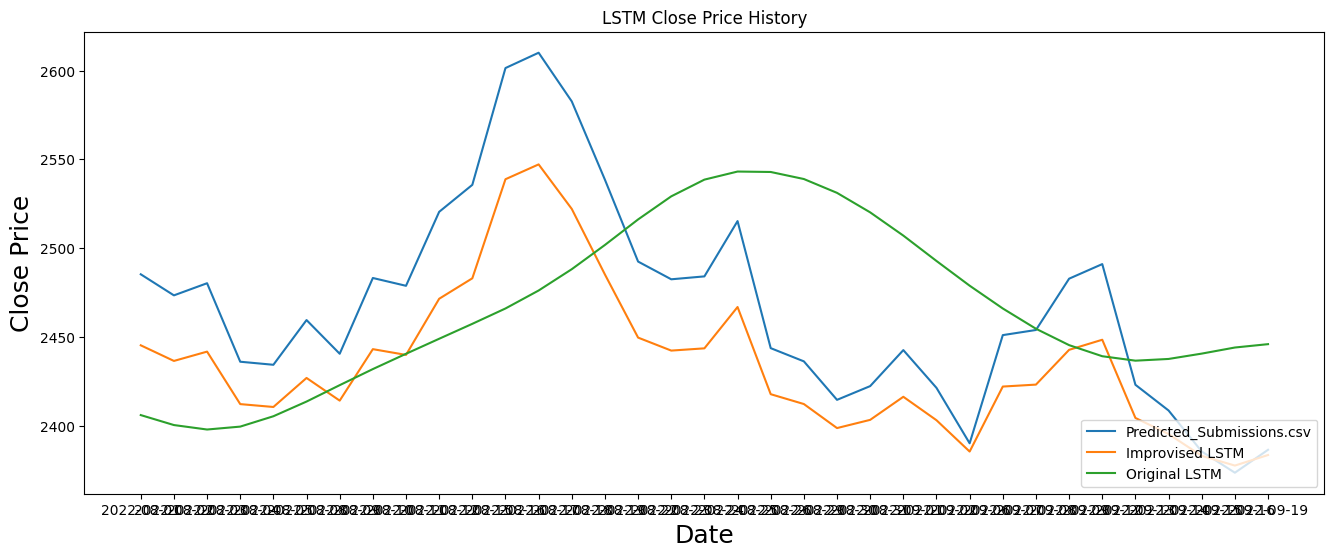

In [70]:
plt.figure(figsize=(16,6))
plt.title('LSTM Close Price History')
plt.plot(lstmTest['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(dftestlstmnew['Close'])
plt.plot(dataset_test['close'])
plt.legend(['Predicted_Submissions.csv', 'Improvised LSTM', 'Original LSTM'], loc='lower right')
plt.show()

# PREDICTING USING LINEAR REGRESSION

In [49]:
df = pd.read_csv('train.csv')
df

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900
...,...,...,...,...,...,...
1650,2022-07-25,2412.25,2429.44,2387.41,2402.95,29106300
1651,2022-07-26,2289.29,2307.08,2255.66,2280.27,48503400
1652,2022-07-27,2309.14,2404.25,2296.82,2395.54,43790900
1653,2022-07-28,2385.58,2443.26,2377.34,2434.89,25807000


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Open','High','Low','Volume']], df[['Close']], test_size=.2)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Root Mean Squared Errror:",np.sqrt(mean_squared_error(y_test,y_pred)))
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = y_pred
df_pred

Root Mean Squared Errror: 9.121351483405011


,Actual,Predicted
325,1281.98,1283.053888
1181,2212.14,2219.413366
977,1954.88,1955.626605
684,1642.71,1637.236556
1141,2161.00,2153.168944
...,...,...
1133,2007.36,2003.182711
1142,2155.04,2150.625996
828,1741.63,1745.654858
224,1206.47,1203.715158


##### RMSE ERROR OF 7.733 for LR compared to train-test split data, Clearly much less than the 73 in lstm

## RUNNING FOR TEST CSV-

In [53]:
dftest = pd.read_csv('test.csv')
dftest.head()

,Date,Open,High,Low,Volume
0,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2022-08-05,2414.66,2444.17,2409.01,18912400


In [54]:
y_testpred = model.predict(dftest[['Open','High','Low','Volume']])
dftestnew = dftest
dftestnew['Close'] = y_testpred
dftestnew[['Date','Close']].head()
#dftestnew.reset_index(inplace = True)
dftestnew[['Date','Close']].to_csv('LRPred.csv', index=False)
dftestnew[['Date','Close']].head()

,Date,Close
0,2022-08-01,2486.196744
1,2022-08-02,2473.786523
2,2022-08-03,2481.236103
3,2022-08-04,2436.948985
4,2022-08-05,2434.341757


In [64]:
# dftestnewind = dftestnew['Date'].astype('datetime64[ns]')
# dftestnewind = dftestnew.set_index('Date')

In [55]:
pred = dftestnew
actual = pd.read_csv('predicted_submission.csv')
print("Root Mean Squared Errror:",np.sqrt(mean_squared_error(actual['Close'],pred['Close'])))

Root Mean Squared Errror: 0.7103781302494039


In [56]:
pred

,Date,Open,High,Low,Volume,Close
0,2022-08-01,2455.71,2500.26,2447.87,24327600,2486.196744
1,2022-08-02,2466.68,2494.73,2447.99,19076300,2473.786523
2,2022-08-03,2473.29,2507.59,2449.39,27459700,2481.236103
3,2022-08-04,2475.98,2487.75,2419.88,23699600,2436.948985
4,2022-08-05,2414.66,2444.17,2409.01,18912400,2434.341757
5,2022-08-08,2444.97,2475.18,2433.03,18104900,2459.753548
6,2022-08-09,2446.62,2458.88,2427.54,16715500,2440.080903
7,2022-08-10,2481.04,2501.79,2463.66,22158000,2483.177769
8,2022-08-11,2500.23,2508.87,2467.32,18470800,2478.632472
9,2022-08-12,2494.85,2535.06,2486.40,18402700,2521.061845


### PLOT

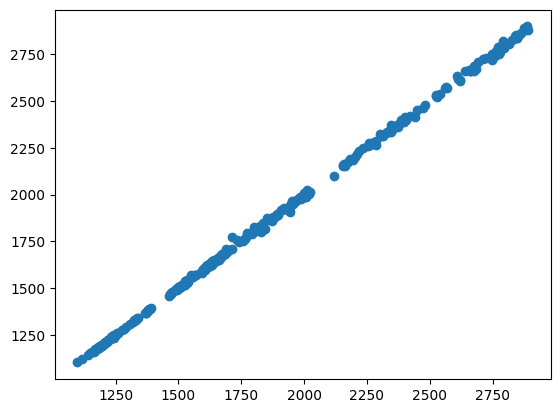

In [57]:
plt.scatter(df_pred['Actual'],df_pred['Predicted'])
plt.show()

In [58]:
dfviz = actual
dfviz

,Date,Close
0,2022-08-01,2485.258236
1,2022-08-02,2473.392252
2,2022-08-03,2480.229564
3,2022-08-04,2436.009407
4,2022-08-05,2434.290058
5,2022-08-08,2459.480698
6,2022-08-09,2440.499846
7,2022-08-10,2483.180050
8,2022-08-11,2478.772758
9,2022-08-12,2520.440403


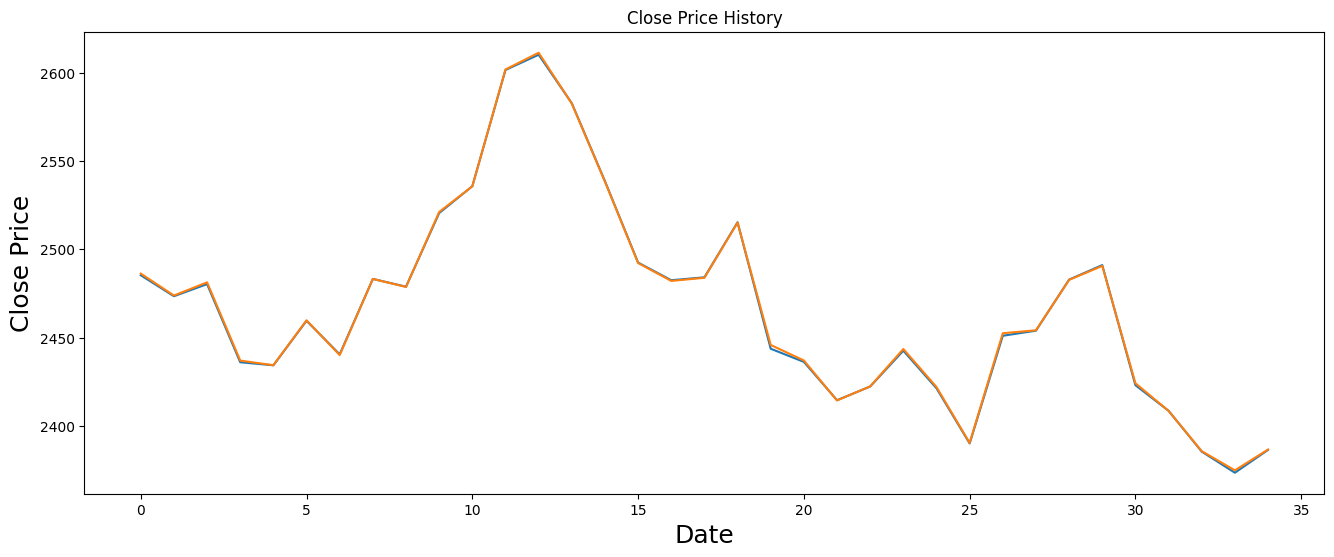

In [59]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(dfviz['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(pred['Close'])
plt.show()

### CLEARLY VERY SIMILAR TO PREDICTED SUBMISSION CSV